# Определение факторов влияющих на успешность игры

## Оглавление
**[1. Открытие файла с данными и изучение общей информации](#чтение_файла)**
   
**[2. Предобработка данных](#предобработка_данных)**
   * [2.1 Изменение названия столбцов](#предобработка_данных__изменение_названия_столбцов)
   * [2.2 Обработка пропущенных значений](#предобработка_данных__обработка_пропущенных_значений)
        * [2.2.1 Обработка пропущенных значений в столбцах name и genre](#предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцах_name_и_genre)
        * [2.2.2 Обработка пропущенных значений в столбцe year_of_release](#предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_year_of_release)
        * [2.2.3 Обработка пропущенных значений в столбцe critic_score](#предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_critic_score)
        * [2.2.4 Обработка пропущенных значений в столбцe user_score](#предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_user_score)
        * [2.2.5 Обработка пропущенных значений в столбцe rating](#предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_rating)
   * [2.3 Замена типа данных](#предобработка_данных__замена_типа_данных)
   * [2.4 Добавление новых данных в таблицу](#предобработка_данных__добавление_новых_данных_в_таблицу)  
   
**[3. Исследовательский анализ данных](#исследовательский_анализ_данных)**

**[4. Портрет пользователя каждого региона](#портрет_пользователя_каждого_региона)**
   * [4.1 Самые популярные платформы (топ-5) по регионам](#портрет_пользователя_каждого_региона__самые_популярные_платформы_(топ-5)_по_регионам)
   * [4.2 Самые популярные жанры (топ-5) по регионам](#портрет_пользователя_каждого_региона__самые_популярные_жанры_(топ-5)_по_регионам)
   * [4.3 Влияние рейтинга ESRB на продажи в отдельном регионе](#портрет_пользователя_каждого_региона__влияние_рейтинга_ESRB_на_продажи_в_отдельном_регионе)
   
**[5. Проверка гипотез](#проверка_гипотез)**
   * [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#проверка_гипотез__средние_пользовательские_рейтинги_платформ_Xbox_One_и_PC_одинаковые)
   * [5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#проверка_гипотез__средние_пользовательские_рейтинги_жанров_Action_и_Sports_разные)  

**[6. Общий вывод](#общий_вывод)**

## 1. Открытие файла с данными и изучение общей информации. <a id="чтение_файлов"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

Воспользуемся функцией, которую написали в предыдущем проекте, для быстрого вывода общей информации о DataFrame.

In [2]:
data = pd.read_csv()

def information(DataFrame):
    display(DataFrame.head(20))
    display(DataFrame.info())
    display(DataFrame.describe())
    print('Количество дубликатов в DataFrame:', DataFrame.duplicated().sum())
    
information(data)   

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Количество дубликатов в DataFrame: 0


DataFrame содержит информацию о 16715 игр для разных игровых платформ.  
DataFrame содержит 11 столбцов: 5 столбцов имеют тип object, 6 столбцов имеют тип float64.   
В столбцах ***Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating*** содержатся пропущенные данные.  
Дубликатов нет.  

### Выводы
Изучили общую инфомрацию о предоставленных данных. Проверили наличие пропущенных значений и дубликатов. Необходимы следующие изменения:
* Привести названия столбцов к нижнему регистру;
* Разобраться с пропущенными данными в столбцах ***Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating***;
* Изменить тип данных для столбцов ***Year_of_Release, User_Score, Critic_Score***.

## 2. Предобработка данных<a id="предобработка_данных"></a>

## 2.1 Изменение названия столбцов<a id="предобработка_данных__изменение_названия_столбцов"></a>

Приведем названия всех столбцов к нижнему регистру.

In [3]:
print('Названия столбцов до изменения: \n', list(data.columns))
data.columns = map(str.lower, data.columns)
print()
print('Названия столбцов после изменения: \n', list(data.columns))

Названия столбцов до изменения: 
 ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

Названия столбцов после изменения: 
 ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


## 2.2 Обработка пропущенных значений<a id="предобработка_данных__обработка_пропущенных_значений"></a>

### 2.2.1 Обработка пропущенных значений в столбцах name и genre<a id="предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцах_name_и_genre"></a>

Проверим количество пропущеннхы значений в столбцах ***name, genre***.

In [4]:
for column in ['name', 'genre']:
    print('Количество пропущенных значений в столбце', column, ':',  data[column].isnull().sum())

Количество пропущенных значений в столбце name : 2
Количество пропущенных значений в столбце genre : 2


Проверим одни и те же эти строки...

In [5]:
data[(data['name'].isnull()) & (data['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Одни и те же строки. Так как таких строк всего 2, то предлагаю удалить их из DataFrame.

In [6]:
data.dropna(subset=['name'], inplace=True)

Проверим, что пропущенных значений в столбцах ***name, genre*** больше нет.

In [7]:
for column in ['name', 'genre']:
    print('Количество пропущенных значений в столбце', column, ':',  data[column].isnull().sum())

Количество пропущенных значений в столбце name : 0
Количество пропущенных значений в столбце genre : 0


### 2.2.2 Обработка пропущенных значений в столбцe year_of_release<a id="предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_year_of_release"></a>

Проверим количество пропущеных значений в столбцe ***year_of_release***.

In [8]:
print('Количество пропущенных значений в столбце year_of_release:', data['year_of_release'].isnull().sum())

Количество пропущенных значений в столбце year_of_release: 269


In [9]:
data[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Проверим, что год релиза одновременно отсутсвтует для всех платформ. Для примера возьмем игру Madden NFL 2004.

In [10]:
data[(data['name'] == 'Madden NFL 2004')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Год выхода отсутсвует только для одной платформы. Напишем функцию, которая будет искать и заменять пропущенные значения года выхода на значения для другой платформы.

In [11]:
def replace_nan_on_year_of_release(row):
    name = row['name']
    year_of_release = row['year_of_release']
    if pd.isna(year_of_release):
        try:
            return data[(data['name'] == name) &  (data['year_of_release'].notna())].reset_index(drop=True).loc[0,'year_of_release']
        except: 
            return year_of_release
    else:
        return year_of_release

In [12]:
data['year_of_release'] = data.apply(replace_nan_on_year_of_release, axis = 1)

Проверим количество пропущенных значений в столбцe ***year_of_release*** после выполнения функции.

In [13]:
print('Количество пропущенных значений в столбце year_of_release:', data['year_of_release'].isnull().sum())

Количество пропущенных значений в столбце year_of_release: 146


Удалось восстановить 123 значения. Заменим оставшиеся пропущенные значения на -1 для удобства дальнейшего анализа.

In [14]:
data['year_of_release'].replace(np.nan,-1, inplace=True)

### 2.2.3 Обработка пропущенных значений в столбцe critic_score<a id="предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_critic_score"></a>

Проверим количество пропущеных значений в столбцe ***critic_score***.

In [15]:
print('Количество пропущенных значений в столбце critic_score:', data['critic_score'].isnull().sum())

Количество пропущенных значений в столбце critic_score: 8576


Так как рейтинг критиков за игру может сильно отличаться от игровой платформы и, соответственно, брать медиану или среднее значение будет неправильно, то восстановить тут никаикие данные не получится. Заменим пропущенные значения на -1 для удобства дальнейшего анализа.

In [16]:
data['critic_score'].replace(np.nan,-1, inplace=True)

### 2.2.4 Обработка пропущенных значений в столбцe user_score<a id="предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_user_score"></a>

Так как данный столбец имеет тип object, то он содержит какие-то текстовые данные. Проверим все уникальные значения, содержащиеся в этом столбце.

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Данный столбец содержит знаечния tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Предлагаю заменить все значения tbd на NaN.

In [18]:
data['user_score'].replace('tbd', np.nan, inplace=True)

Поменяем тип данных в столбце на float64.

In [19]:
data['user_score'] = data['user_score'].astype(float)

Проверим количество пропущеных значений в столбцe ***user_score***.

In [20]:
print('Количество пропущенных значений в столбце user_score:', data['user_score'].isnull().sum())

Количество пропущенных значений в столбце user_score: 9123


Так как пользовательский рейтинг за игру может сильно отличаться от игровой платформы и, соответственно, брать медиану или среднее значение будет неправильно, то восстановить тут никаикие данные не получится. Заменим пропущенные значения на -1 для удобства дальнейшего анализа.

In [21]:
data['user_score'].replace(np.nan,-1, inplace=True)

### 2.2.5 Обработка пропущенных значений в столбцe rating<a id="предобработка_данных__обработка_пропущенных_значений__обработка_пропущенных_значений_в_столбцe_rating"></a>

Посмотрим какие уникальные значения есть в этом столбце.

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Проверим количество пропущеных значений в столбцe ***rating***.

In [23]:
print('Количество пропущенных значений в столбце rating:', data['rating'].isnull().sum())

Количество пропущенных значений в столбце rating: 6764


Так как рейтинг от организации ESRB не зависит от игровой платформы, то напишем функцию, которая будет искать и заменять пропущенные значения рейтинга от организации ESRB на значения для других платформ.

In [24]:
def replace_nan_on_rating(row):
    name = row['name']
    rating = row['rating']
    
    if pd.isna(rating):
        try:
            return data[(data['name'] == name) &  (data['rating'].notna())]['rating'].reset_index(drop=True).loc[0,'rating']
        except: 
            return rating
    else:
        return rating

In [25]:
data['rating'] = data.apply(replace_nan_on_rating, axis = 1)

Проверим количество пропущенных значений в столбцe ***rating*** после выполнения функции.

In [26]:
print('Количество пропущенных значений в столбце rating:', data['rating'].isnull().sum())

Количество пропущенных значений в столбце rating: 6764


Не удалось восстановить никакие значения. Тогда оставим этот столбец без изменений.

In [27]:
data['rating'].replace(np.nan,'unrated', inplace=True)

## 2.3 Замена типа данных<a id="предобработка_данных__замена_типа_данных"></a>

Для столбцов ***year_of_release, critic_score*** заменим тип данных на целочисленный.

In [28]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['critic_score'] = data['critic_score'].astype(int)

## 2.4 Добавление новых данных в таблицу<a id="предобработка_данных__добавление_новых_данных_в_таблицу"></a>

Посчитаем суммарные продажи по всем регионам для каждой игры и добавим их в DataFrame.

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Выведем информацию о DataFrame после всех изменений.

In [30]:
information(data)   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unrated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unrated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unrated,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,1988.951834,0.263302,0.145045,0.077625,0.047343,33.064920,2.689888,0.533315
std,186.905503,0.813565,0.503359,0.308871,0.186742,36.299815,4.169887,1.548282
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Количество дубликатов в DataFrame: 0


### Выводы
* Привели названия столбцов к нижнему регистру;
* Удалили строки с пропущенными данными в столбцах ***name, genre***;
* Заменили все возможные пропущенные данные в столбце ***year_of_release*** на среднее значение по игровым платформам;
* Изменили тип данных в столбцах ***year_of_release, critic_score*** на int;
* Изменили тип данных в столбцах ***user_score*** на float;
* Добавили в таблицу данные о суммарной продаже игры для каждой игроовой платформы по всем регионам.

## 3. Исследовательский анализ данных<a id="исследовательский_анализ_данных"></a>

Построим столбчатую диаграмму количества выпущенных игр по годам.

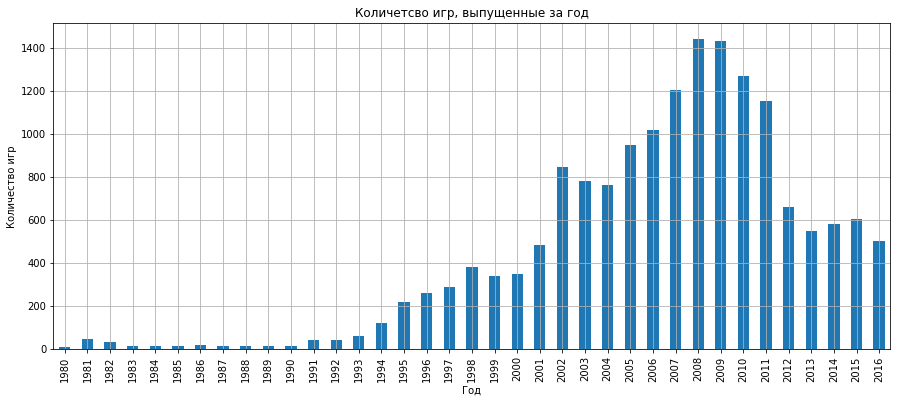

In [31]:
data[data['year_of_release'] > 0].groupby('year_of_release')['name'].count().plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Количетсво игр, выпущенные за год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

До 1995 года игр выпускалось очень мало, поэтому можно рассматривать только период начиная с 1995 года. Также по диаграмме видно, как до 2009 года росо количество выпускаемых игр, а после мы видим резкий спад. Можно предположить, что началась эра мобильных игр и многие разработчики переключились на это направление.

Построим столбчатую диаграмму общих продаж для каждой платформы. И вывыдем топ10 платформ по продажам.

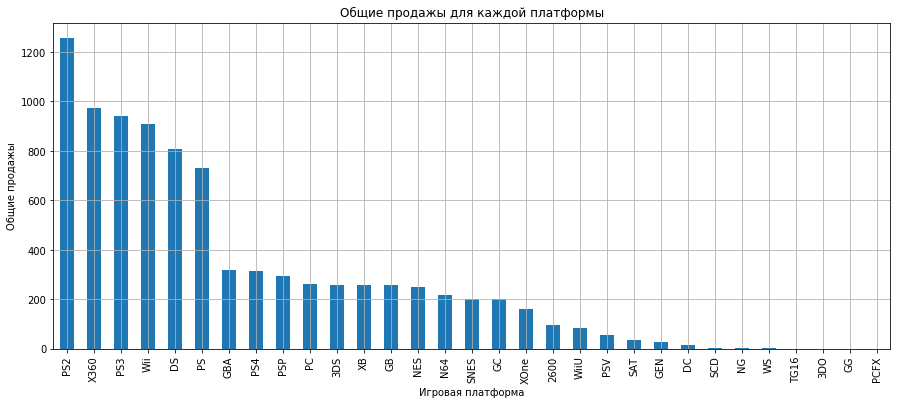

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

In [32]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы для каждой платформы')
plt.xlabel('Игровая платформа')
plt.ylabel('Общие продажы')
plt.show()
data_top10_platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)
display(data_top10_platform_sales)

Построим столбчатую диаграмму общих продаж для топ10 платформ с 1995 года.

In [33]:
data_new = data[(data['year_of_release'] > 1994)].pivot_table(index=['year_of_release'], columns=['platform'], values = 'total_sales', aggfunc={'sum'})
data_new.columns = data_new.columns.droplevel(0)
data_new = data_new.loc[:,data_top10_platform_sales.index].replace(np.nan, 0)

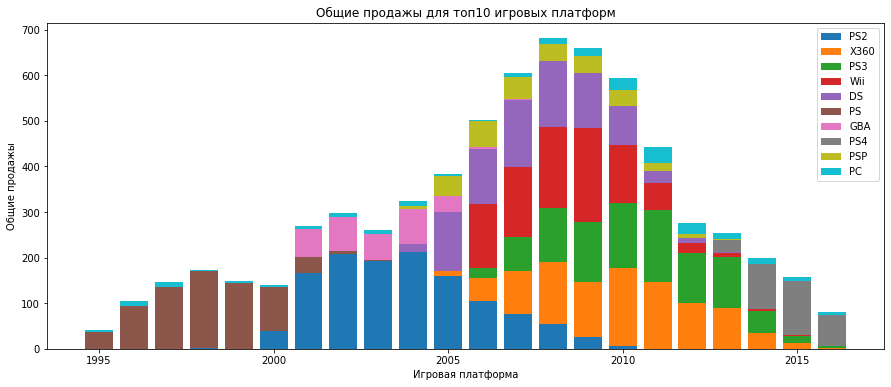

In [34]:
fig, ax = plt.subplots()
scale =  np.zeros(len(data_new))
for platform in data_new.columns:
    ax.bar(data_new.index, data_new[platform], bottom = scale)
    scale = [x+y for x, y in zip(scale, list(data_new[platform]))]  

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.legend(data_new.columns)
plt.title('Общие продажы для топ10 игровых платформ')
plt.xlabel('Игровая платформа')
plt.ylabel('Общие продажы')
plt.show()

По диаграмме отлично прослеживается тенденция роста и падения популярности игровых платформ. Своего пика популярности игровая платформа достигает в среднем через 4-5 лет. Последние три года (начиная с 2014) самой популярной игровой платформой является PS4.

Посчитаем жизненный цикл игровой платформы. Для этого посчитаем сколько лет для каждой игровой плалфтормы продавались игры.

count    31.000000
mean      8.741935
std       7.839931
min       0.000000
25%       3.000000
50%       8.000000
75%      11.000000
max      31.000000
Name: year_of_release, dtype: float64

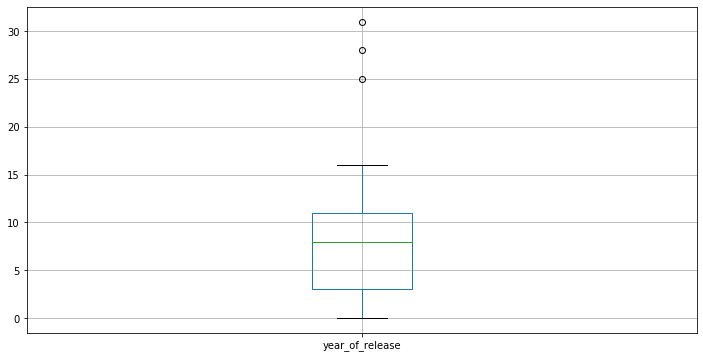

In [35]:
data_year = data[data['year_of_release'] > 0].groupby('platform')['year_of_release'].max() - data[data['year_of_release'] > 0].groupby('platform')['year_of_release'].min()
data_year.plot.box(figsize = (12, 6), grid = True)
data_year.describe()

Из результатов делаем вывод, что жизненный цикл игровой платформы составляет 8 лет с пиком популярности на 4 год выпуска игровой платформы. Поэтому актуальными данными будем считать период с 2013 года (год выхода PS4). 

Создадим новый DataFrame, который будет содержать информацию для игр вышедших после 2013 года.

In [36]:
data_actual = data.query('year_of_release >= 2013')

Построим столбчатую диаграмму общих продаж с 2013 года. 

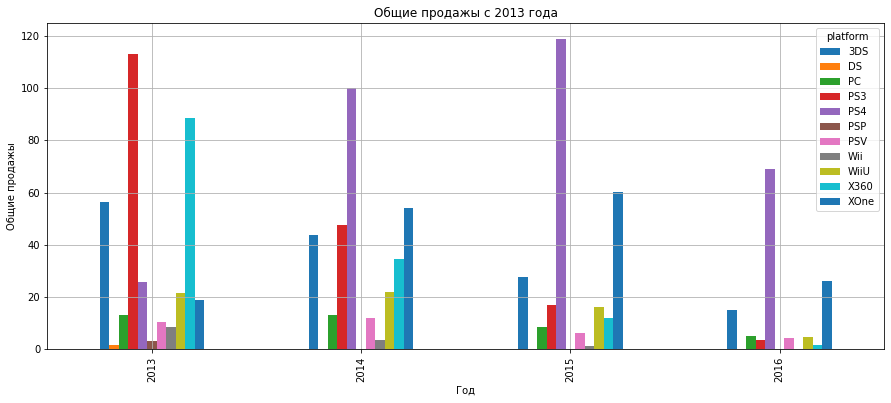

In [37]:
data_actual_sales_by_platform = data_actual.pivot_table(index=['year_of_release'], columns=['platform'], values = 'total_sales', aggfunc={'sum'})
data_actual_sales_by_platform.columns = data_actual_sales_by_platform.columns.droplevel(0)
data_actual_sales_by_platform = data_actual_sales_by_platform.replace(np.nan, 0)
data_actual_sales_by_platform.plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы с 2013 года')
plt.xlabel('Год')
plt.ylabel('Общие продажы')
plt.show()

По графику видно, что в 2013 году на рынке видеоигр преобладали игры для 3DS, PS3, X360. Это был пик популярности этих игровых платформ, так как затем (2014-2016 года) продажы видеоигр для этих платформ практически прекратились. На 2016 год самыми популрными игровыми платформами являются PS4, Xbox One, 3DS. PS4, Xbox One вышли в конце 2013 года и поэтому в 2017 году они должны выйти на пик своей популярности. Поэтому акцент в 2017 году стоит сделать именно на эти две игровые платформы.

Построим диаграмму размаха дохода с продажи для игр с 2013 года.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


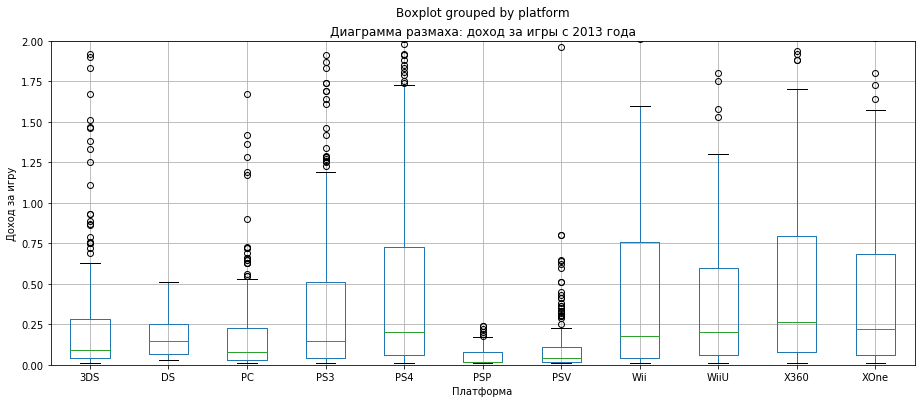

In [38]:
data_actual.boxplot(by = 'platform', column='total_sales', figsize = (15,6))
plt.ylim(0, 2)
plt.title('Диаграмма размаха: доход за игры с 2013 года')
plt.xlabel('Платформа')
plt.ylabel('Доход за игру')
plt.show()

По диаграмме видно, что медиана у всех платформ разная. Наиболее выгодно выпускать игр в период с 2013 по 2016 года было для PS3, PS4, Wii, WiiU, X360, XOne.

Посмотрим какая игровая консоль лидирует по количеству продаж за актуальный период.

In [39]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(10)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       40.06
PSV      32.99
Wii      13.66
PSP       3.74
Name: total_sales, dtype: float64

С огромным отрывом лидирует PS4.

Построим для этой игровой платформы PS4 диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами.

Коэффициент корреляции: 0.41


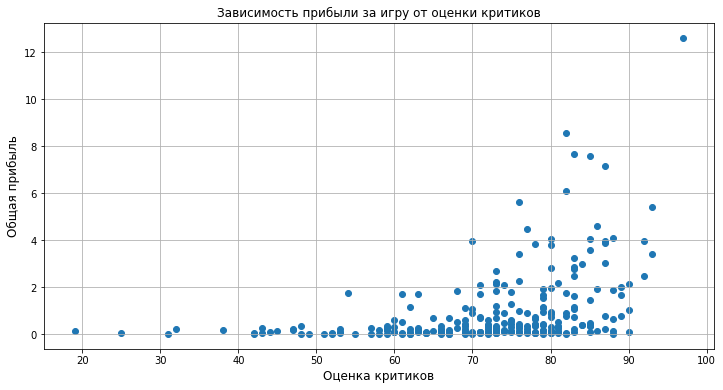

In [40]:
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(data_actual.query('platform == "PS4" & critic_score > 0')['critic_score'], 
            data_actual.query('platform == "PS4" & critic_score > 0')['total_sales'])
ax1.set_xlabel('Оценка критиков', fontsize=12)
ax1.set_ylabel('Общая прибыль', fontsize=12)
ax1.set_title('Зависимость прибыли за игру от оценки критиков')
ax1.grid(True)

print('Коэффициент корреляции: {:.2f}'.format(data_actual.query('platform == "PS4" & critic_score > 0')['critic_score']
                                              .corr(data_actual.query('platform == "PS4" & critic_score > 0')['total_sales'])))

Построим для этой игровой платформы диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами.

Коэффициент корреляции: -0.03


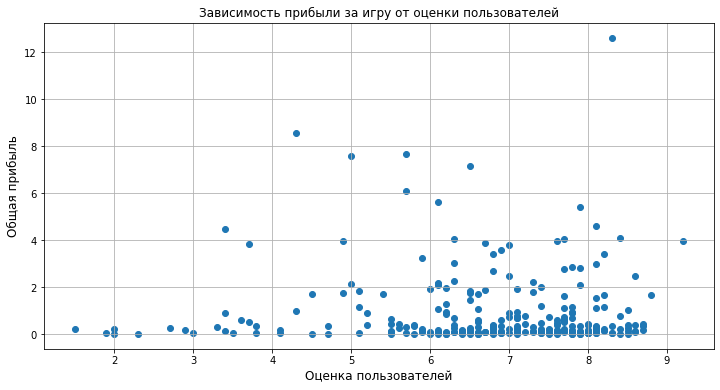

In [41]:
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.scatter(data_actual.query('platform == "PS4" & user_score > 0')['user_score'], 
            data_actual.query('platform == "PS4" & user_score > 0')['total_sales'])
ax1.set_xlabel('Оценка пользователей', fontsize=12)
ax1.set_ylabel('Общая прибыль', fontsize=12)
ax1.set_title('Зависимость прибыли за игру от оценки пользователей')
ax1.grid(True)

print('Коэффициент корреляции: {:.2f}'.format(data_actual.query('platform == "PS4" & user_score > 0')['user_score']
                                              .corr(data_actual.query('platform == "PS4" & user_score > 0')['total_sales'])))

Оценка пользователей никак не сказывается на общей прибыли за игру, что подтверждается значением коэффициента корреляции равным -0.03.  
Оценка критиков имеет некотое влияние на общую прибыль за игру, что подтверждается значением коэффициента корреляции равным 0.41.

Проверим, что такая тенденция сохраняется и для других платформ. Возьмем для этого следующие 4 популярные игровые платформы: PS3, XOne, 3DS, X360.

Игровая платформа: PS3
Коэффициент корреляции оценки критиков и общей прибыли за игру: 0.33
Коэффициент корреляции оценки пользователей и общей прибыли за игру: 0.00


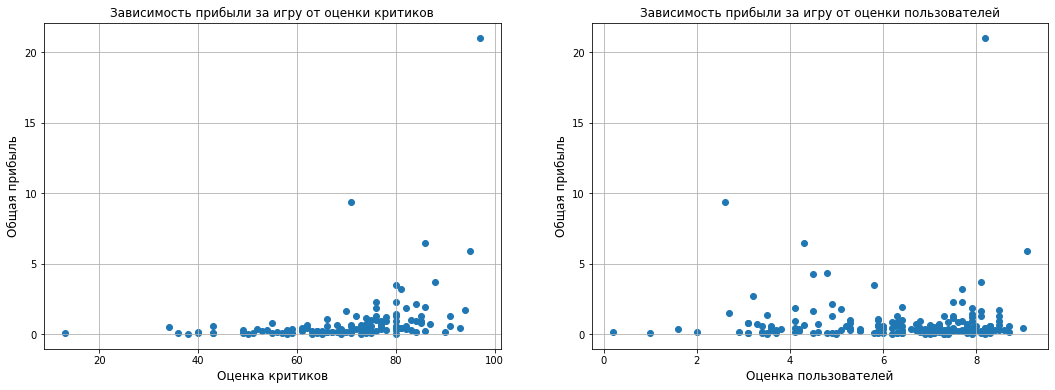


Игровая платформа: XOne
Коэффициент корреляции оценки критиков и общей прибыли за игру: 0.42
Коэффициент корреляции оценки пользователей и общей прибыли за игру: -0.07


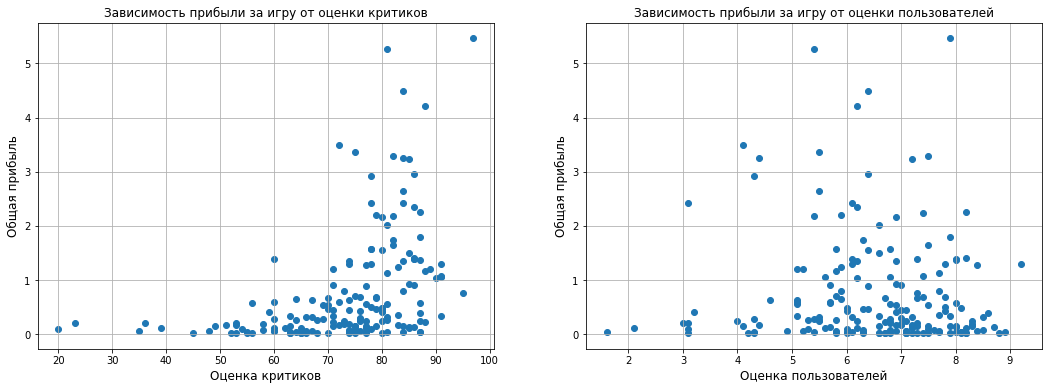


Игровая платформа: 3DS
Коэффициент корреляции оценки критиков и общей прибыли за игру: 0.36
Коэффициент корреляции оценки пользователей и общей прибыли за игру: 0.24


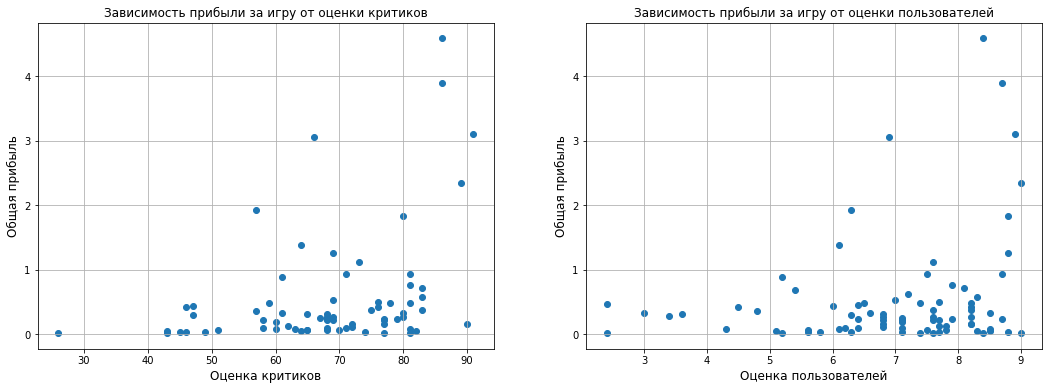


Игровая платформа: X360
Коэффициент корреляции оценки критиков и общей прибыли за игру: 0.35
Коэффициент корреляции оценки пользователей и общей прибыли за игру: -0.01


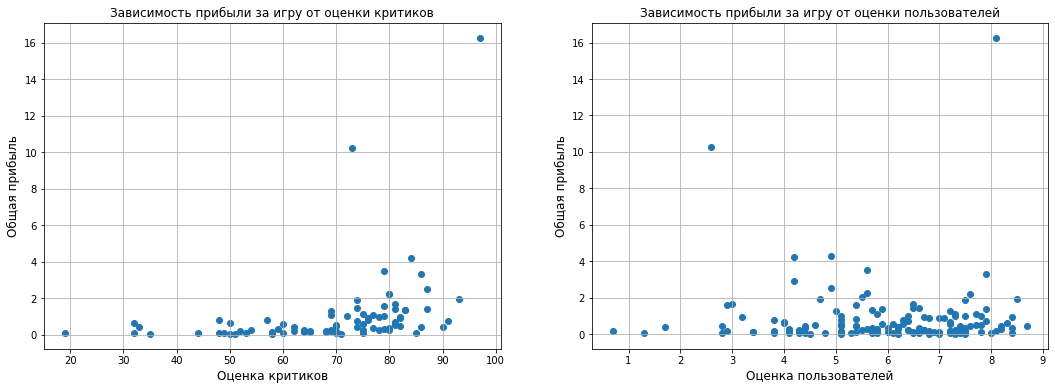

In [42]:
for platform in ['PS3', 'XOne', '3DS', 'X360']:
    print('Игровая платформа:', platform)
    
    print('Коэффициент корреляции оценки критиков и общей прибыли за игру: {:.2f}'
          .format(data_actual.query('platform == @platform & critic_score > 0')['critic_score']
                  .corr(data_actual.query('platform == @platform & critic_score > 0')['total_sales'])))
    
    print('Коэффициент корреляции оценки пользователей и общей прибыли за игру: {:.2f}'
          .format(data_actual.query('platform == @platform & user_score > 0')['user_score']
                  .corr(data_actual.query('platform == @platform & user_score > 0')['total_sales'])))
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18, 6))
    
    ax1.scatter(data_actual.query('platform == @platform & critic_score > 0')['critic_score']
                , data_actual.query('platform == @platform & critic_score > 0')['total_sales'])
    ax1.set_xlabel('Оценка критиков', fontsize=12)
    ax1.set_ylabel('Общая прибыль', fontsize=12)
    ax1.set_title('Зависимость прибыли за игру от оценки критиков')
    ax1.grid(True)
    
    ax2.scatter(data_actual.query('platform == @platform & user_score > 0')['user_score']
                , data_actual.query('platform == @platform & user_score > 0')['total_sales'])
    ax2.set_xlabel('Оценка пользователей', fontsize=12)
    ax2.set_ylabel('Общая прибыль', fontsize=12)
    ax2.set_title('Зависимость прибыли за игру от оценки пользователей')
    ax2.grid(True)
    plt.show()
    print()

В целом тенденция отмеченая для игровой платформы PS4 сохраняется и для остальных игровых платформ, за исключением 3DS. Для 3DS коэффициент корреляции оценки пользователей и общей прибыли за игру составляет 0.24. Это означает, что есть некоторое влияние оценки пользователей на общую прибыль за игру.

Построим столбчатую диаграмму количества выпущенных игр по жанрам.

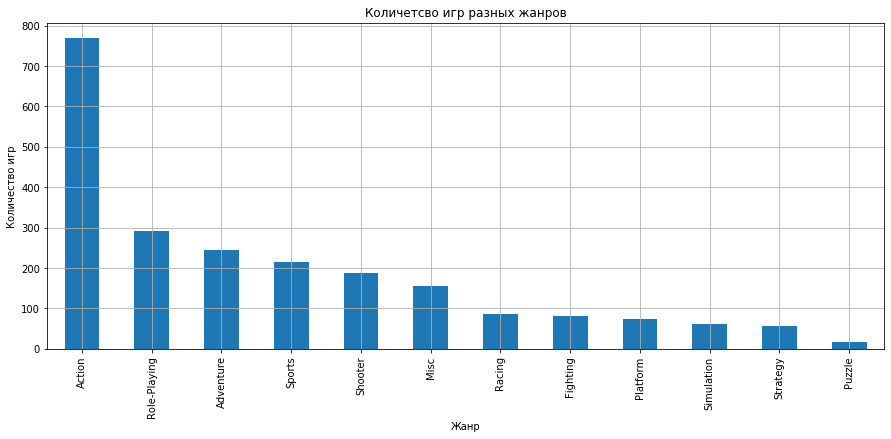

genre
Action          769
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            156
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

In [43]:
data_actual.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Количетсво игр разных жанров')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()
display(data_actual.groupby('genre')['name'].count().sort_values(ascending = False))

Больше всего с 2013 года было выпушено игр жанра Action - 769, меньше всего игр жанра Puzzle - 17.

Построим столбчатую диаграмму общей прибыли от игр по жанрам.

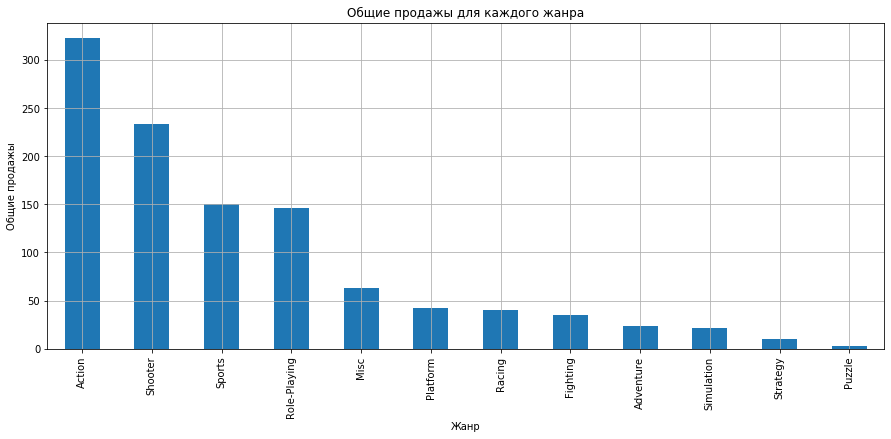

genre
Action          322.50
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             63.06
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

In [44]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы для каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Общие продажы')
plt.show()
display(data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False))

Наибольшая суммарная прибыль с 2013 года от игр жанра Action - 322.5, наименьшая от игр жанра Puzzle - 3.17.

Построим диаграмму размаха дохода с продажи для игр с 2013 года по жанрам.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


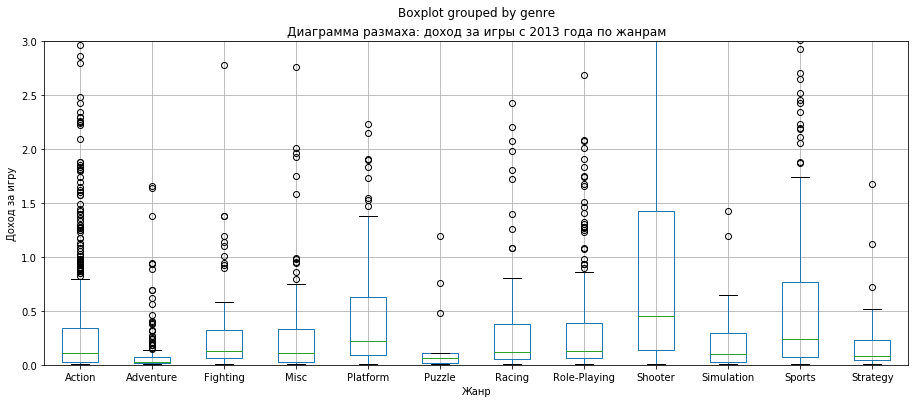

In [45]:
data_actual.boxplot(by = 'genre', column='total_sales', figsize = (15,6))
plt.ylim(0, 3)
plt.title('Диаграмма размаха: доход за игры с 2013 года по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Доход за игру')
plt.show()

Хоть и суммарная выручка больше у игр жанра Action, но в среднем игра жанра Shooter приносит больше прибыли.

### Выводы
В результате исследовательского анализа данных удалось выяснить следующее:  

***КОЛИЧЕСТВО ВЫПУСКАЕМЫХ ВИДЕОИГР В ГОД.***
* **До 1995 года** выпускалось очень мало видеоигр;
* **До 2009** года количество впускаемых игр для игровых платформ в год постоянно росло, но затем начился постепенный спад.  
* **В 2012 году** случился резкий пропал, количество выпускамых игр упало почти в два раза. Можно предположить, что широкое распространение получили мобильные игры и многие разработчики видеоигр переключились на это перспективное направление.  
* **С 2012 по 2016 года** количество выпускаемых видеоигр в год практически не меняется.

***САМЫЕ ПРИБЫЛЬНЫЕ ИГРОВЫЕ ПЛАТФОРМЫ ЗА ВСЕ ВРЕМЯ.***  
Самой прибыльной игровой платформой является **PS2**. Общая прибыль составили **1255.77**.  
**Топ 10** самых прибыльных игровых платформ:

**Платформа**  | **Общая прибыль**
:-------------: | :-------------:
PS2   |   1255.77
X360  |   971.42
PS3   |   939.65
Wii   |   907.51
DS    |   806.12
PS    |   730.86
GBA   |   317.85
PS4   |   314.14
PSP   |   294.05
PC    |   259.52

***ЖИЗНЕННЫЙ ЦИКЛ ИГРОВОЙ ПЛАТФОРМЫ.***  
Жизненный цикл игровой платформы составляет **8 лет** с пиком популярности **на 4 год** выпуска игровой платформы. Поэтому актуальными данными был выбран промежуток времени **с 2013 по 2016 год**.

***ОБЩИЕ ПРОДАЖИ ВИДЕОИГР ПО ПЛАТФОРМАМ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **В 2013 году** на рынке видеоигр преобладали продажи игр для **3DS, PS3, X360**. Это был пик популярности этих игровых платформ, так как затем (2014-2016 года) продажы видеоигр для этих платформ практически прекратились.
* **На 2016 год** самыми популрными игровыми платформами являются **PS4, Xbox One, 3DS**. PS4, Xbox One вышли в конце 2013 года и поэтому в 2017 году они должны выйти на пик своей популярности. Поэтому акцент **в 2017 году** стоит сделать именно на эти две игровые платформы.
* Наиболее выгодно было выпускать игры в этот период для следующих игровых платформ: **PS3, PS4, Wii, WiiU, X360, XOne**, так как медиана прибыли за одну игру у них выше, чем у других игровых платформ.

***САМЫЕ ПРИБЫЛЬНЫЕ ИГРОВЫЕ ПЛАТФОРМЫ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
Самой прибыльной игровой платформой за актуальной период является **PS4**. Общая прибыль составили **314.14**.  
**Топ 10** самых прибыльных игровых платформ за актуальный период:

**Платформа**  | **Общая прибыль**
:-------------: | :-------------:
PS4   |  314.14
PS3   |  181.43
XOne  |  159.32
3DS   |  143.25
X360  |  136.80
WiiU  |   64.63
PC    |   40.06
PSV   |   32.99
Wii   |   13.66
PSP   |    3.74

***ВЛИЯНИЕ ОЦЕНОК КРИТИКОВ И ПОЛЬЗОВАТЕЛЕЙ НА ОБЩУЮ ПРИБЫЛЬ ЗА ИГРУ ДЛЯ ТОП5 ПЛАТФОРМ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  

* **Игровая платформа: PS4**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.41**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.03**  


* **Игровая платформа: PS3**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.33**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **0.00**  


* **Игровая платформа: XOne**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.42**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.07**  


* **Игровая платформа: 3DS**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.36**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **0.24**   


* **Игровая платформа: X360**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.35**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.01**  

Оценка пользователей никак не сказывается на общей прибыли за игру, что подтверждается значением коэффициента.
Оценка критиков имеет некотое влияние на общую прибыль за игру, что подтверждается значением коэффициента корреляции.
В целом такая тенденция сохраняется для всех игровых платформ, за исключением 3DS. Для 3DS коэффициент корреляции оценки пользователей и общей прибыли за игру составляет 0.24. Это означает, что есть некоторое влияние оценки пользователей на общую прибыль за игру.

***КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР РАЗНЫХ ЖАНРОВ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
**Больше** всего было выпущено игр жанра **Action - 769**, **меньше** всего жанра **Puzzle - 17**.  
Распределение выпущенных игр по жанрам:  

**Жанр**  | **Количество игр**
:-------------: | :-------------:
Action          | 769
Role-Playing    | 292
Adventure       | 245
Sports          | 214
Shooter         | 187
Misc            | 156
Racing          | 85
Fighting        | 80
Platform        | 74
Simulation      | 62
Strategy        | 56
Puzzle          | 17

***ОБЩАЯ ПРИБЫЛЬ ОТ ИГР В ЗАВИСИМОСТИ ОТ ЖАНРА ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
**Самым прибыльным** жанром за актуальный период является ***Action - 322.5**, **меньше всего** принесли дохода игры жанра **Puzzle - 3.17**.
Распределение прибыли от игр по жанрам:  

**Жанр**  | **Общая прибыль**
:-------------: | :-------------:
Action          | 322.50
Shooter         | 232.98
Sports          | 150.65
Role-Playing    | 145.89
Misc            | 63.06
Platform        | 42.63
Racing          | 39.89
Fighting        | 35.31
Adventure       | 23.64
Simulation      | 21.76
Strategy        | 10.08
Puzzle          | 3.17

Хоть и суммарная выручка больше у игр жанра Action, но в среднем игра жанра Shooter приносит больше прибыли.

## 4. Портрет пользователя каждого региона<a id="портрет_пользователя_каждого_региона"></a>

## 4.1 Самые популярные платформы (топ-5) по регионам<a id="портрет_пользователя_каждого_региона__самые_популярные_платформы_(топ-5)_по_регионам"></a>

Построим столбчатую диаграмму общих продаж по платформам для каждого региона.

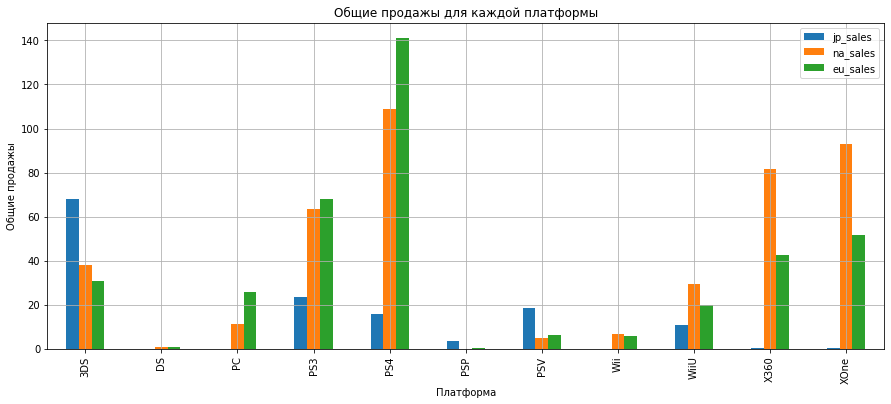

jp_sales
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

na_sales
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

eu_sales
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64



In [46]:
data_actual.groupby('platform')[['jp_sales', 'na_sales', 'eu_sales']].sum().plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Общие продажы')
plt.show()
for region in ['jp_sales', 'na_sales', 'eu_sales']:
    print(region)
    print(data_actual.groupby('platform')[region].sum().sort_values(ascending = False).head(5))
    print()

Построим круговую диаграмму для топ5 платформ по прибыли от проданных игр для каждого регионаю

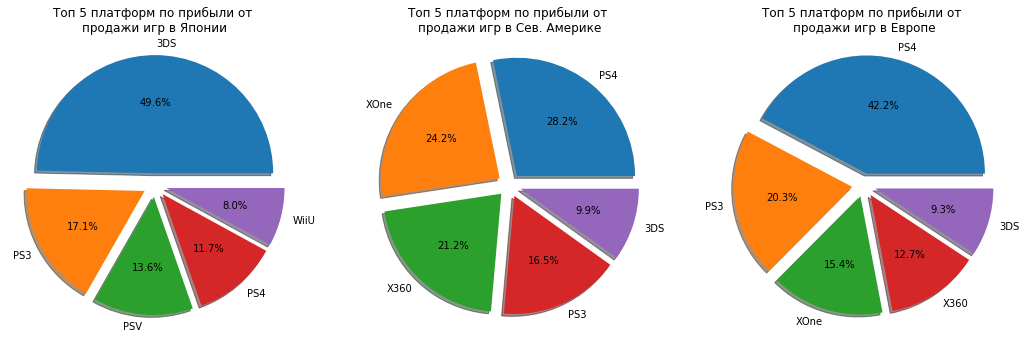

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

explode = list()
for k in range(5):
    explode.append(0.1)

def plot_pie(region, ax):
    ax.pie(data_actual.groupby('platform')[region].sum().sort_values(ascending = False).head(5)
        , labels=data_actual.groupby('platform')[region].sum().sort_values(ascending = False).head(5).index
        , explode=explode, shadow=True, autopct='%1.1f%%')
    
plot_pie('jp_sales', ax1)  
ax1.set_title('Топ 5 платформ по прибыли от \nпродажи игр в Японии')

plot_pie('na_sales', ax2)  
ax2.set_title('Топ 5 платформ по прибыли от \nпродажи игр в Сев. Америке')

plot_pie('eu_sales', ax3)  
ax3.set_title('Топ 5 платформ по прибыли от \nпродажи игр в Европе')

plt.show()
print()

В Японии самой популярной считается игрова платформа 3DS. Это портативная игровая платформа. Скорее всего японцы играют только, когда они в пути: на работу, учебу и так далее. Интересно отметить, что в Японии до сих пор более популярной считается PS3, чем PS4.  

В Северной Америке приблизительно равные доли имеют 3 игровые платформы: XOne, PS4, X360. XOne, PS4 на 2016 год были самыми передовыми платформами. Жители этого континента следят за технологическим погрессом и используют лучшие игровые платформы.  

В Европе с большим отрывом лидирует PS4. Самое интересное, что на 2 месте по популярности игровая платформа PS3. И только потом идут консоли от Microsoft: XOne, X360. Видимо геймеры Европы больше отдают свое предпочтение игровым платформам от Sony.

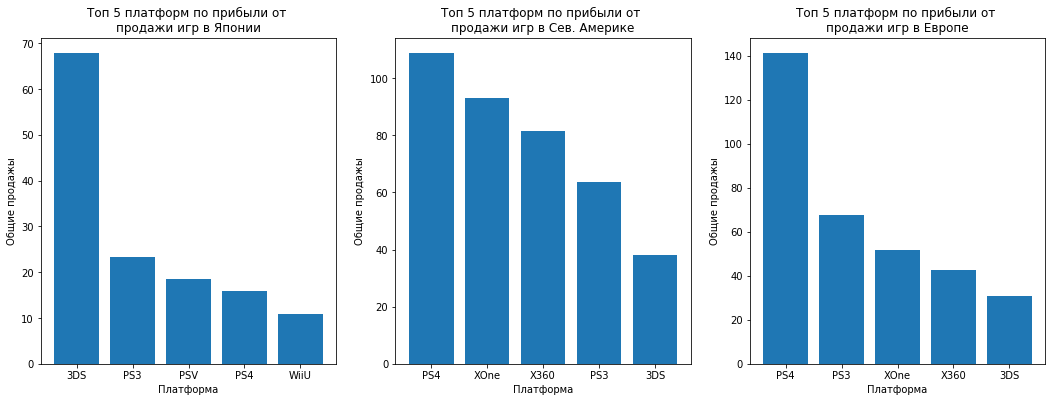

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
def plot_bar(region, ax, title, xlabel='Платформа', ylabel='Общие продажы'):
    ax.bar(data_actual.groupby('platform')[region].sum().sort_values(ascending = False).head(5).index, data_actual.groupby('platform')[region].sum().sort_values(ascending = False).head(5))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    
plot_bar('jp_sales', ax1, 'Топ 5 платформ по прибыли от \nпродажи игр в Японии')  
plot_bar('na_sales', ax2, 'Топ 5 платформ по прибыли от \nпродажи игр в Сев. Америке')  
plot_bar('eu_sales', ax3, 'Топ 5 платформ по прибыли от \nпродажи игр в Европе')  

plt.show()


## 4.2 Самые популярные жанры (топ-5) по регионам<a id="портрет_пользователя_каждого_региона__самые_популярные_жанры_(топ-5)_по_регионам"></a>

Построим столбчатую диаграмму общих продаж по жанрам для каждого региона.

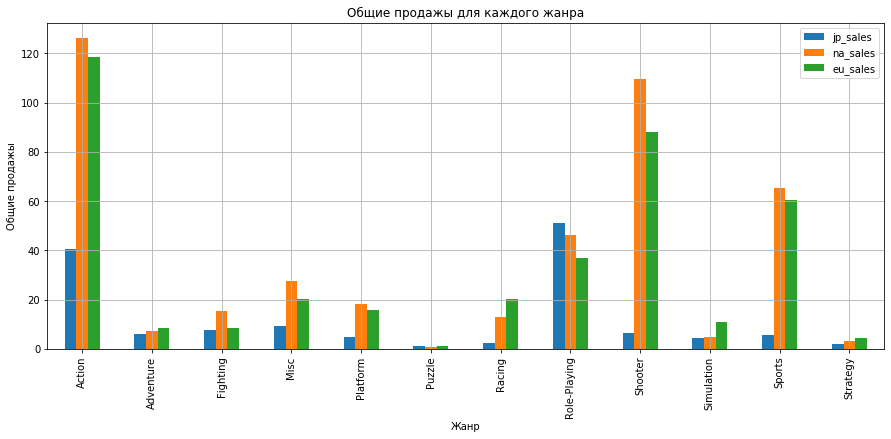

jp_sales
genre
Role-Playing    51.04
Action          40.49
Misc             9.44
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

na_sales
genre
Action          126.13
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

eu_sales
genre
Action          118.61
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64



In [49]:
data_actual.groupby('genre')[['jp_sales', 'na_sales', 'eu_sales']].sum().plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы для каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Общие продажы')
plt.show()
for region in ['jp_sales', 'na_sales', 'eu_sales']:
    print(region)
    print(data_actual.groupby('genre')[region].sum().sort_values(ascending = False).head(5))
    print()

Построим круговую диаграмму для топ5 жанров по прибыли от проданных игр для каждого регионаю

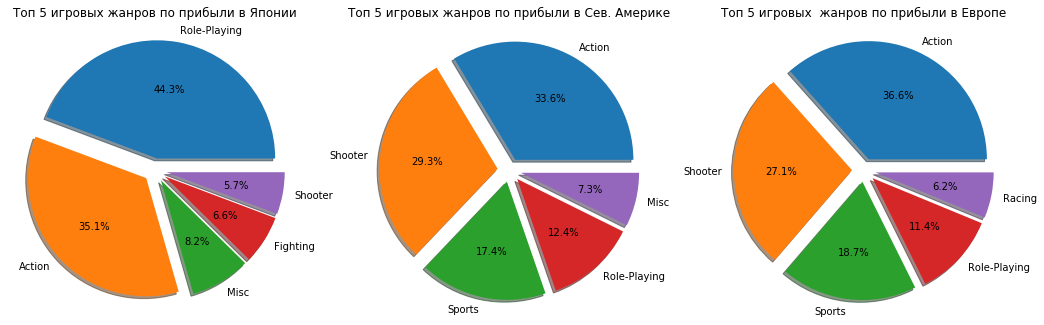

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

explode = list()
for k in range(5):
    explode.append(0.1)

def plot_pie(region, ax):
    ax.pie(data_actual.groupby('genre')[region].sum().sort_values(ascending = False).head(5)
        , labels=data_actual.groupby('genre')[region].sum().sort_values(ascending = False).head(5).index
        , explode=explode, shadow=True, autopct='%1.1f%%')
    
plot_pie('jp_sales', ax1)  
ax1.set_title('Топ 5 игровых жанров по прибыли в Японии')

plot_pie('na_sales', ax2)  
ax2.set_title('Топ 5 игровых жанров по прибыли в Сев. Америке')

plot_pie('eu_sales', ax3)  
ax3.set_title('Топ 5 игровых  жанров по прибыли в Европе')

plt.show()
print()

В Японии самой популярными жанрами являются RPG и Action. Продажи этих 2-х жанров составляют порядка 80% от всех продаж видеоигр в Японии.

В Северной Америке два самых популярных жанра являются Action и Shooter. На 3-м месте идет Sports.

В Европе картина очень похожа на ситуацию в Северной Америке. Только доля продаж игр жанра Action больше, чем игр жанра Shooter. На 3-м месте здесь тоже игры жанра Sports. Отличие состоит в том, что в Европе на 5 месте игры жанра Racing, а вот в Севереной Америке на 5 месте игры жанра Misc.

## 4.3 Влияние рейтинга ESRB на продажи в отдельном регионе<a id="портрет_пользователя_каждого_региона__влияние_рейтинга_ESRB_на_продажи_в_отдельном_регионе"></a>

Построим столбчатую диаграмму общих продаж от рейтинга ESRB для каждого региона.

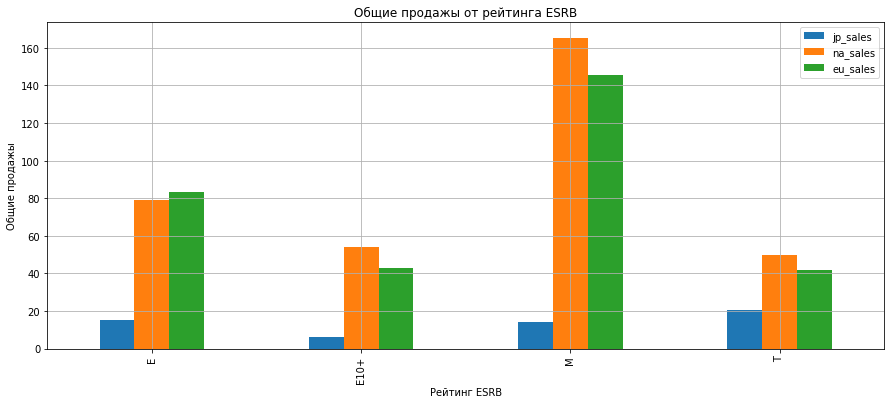

jp_sales
rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

na_sales
rating
M       165.29
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

eu_sales
rating
M       145.80
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64



In [51]:
data_actual[data_actual['rating'] != 'unrated'].groupby('rating')[['jp_sales', 'na_sales', 'eu_sales']].sum().plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы от рейтинга ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Общие продажы')
plt.show()
for region in ['jp_sales', 'na_sales', 'eu_sales']:
    print(region)
    print(data_actual[data_actual['rating'] != 'unrated'].groupby('rating')[region].sum().sort_values(ascending = False).head(5))
    print()

Построим круговую диаграмму общих продаж от рейтинга ESRB для каждого региона.

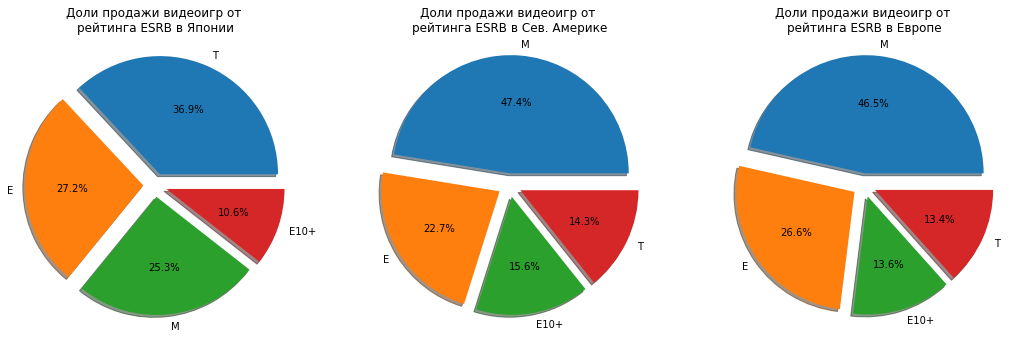

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

explode = list()
for k in range(4):
    explode.append(0.1)

def plot_pie(region, ax):
    ax.pie(data_actual[data_actual['rating'] != 'unrated'].groupby('rating')[region].sum().sort_values(ascending = False)
        , labels=data_actual[data_actual['rating'] != 'unrated'].groupby('rating')[region].sum().sort_values(ascending = False).index
        , explode=explode, shadow=True, autopct='%1.1f%%')
    
plot_pie('jp_sales', ax1)  
ax1.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Японии')

plot_pie('na_sales', ax2)  
ax2.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Сев. Америке')

plot_pie('eu_sales', ax3)  
ax3.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Европе')

plt.show()
print()

Рейтинг ***ESRB***:
* **E**    : Игра подходит для лиц от 6 лет и старше;
* **E10+** : Игра подходит для лиц от 10 лет и старше;
* **T**    : Игра подходит для лиц от 13 лет и старше;
* **M**    : Игра подходит для лиц от 17 лет и старше.



В Европе и Северной Америке картина одинакова. Больше всего продаж от игры рейтинга M (почти половина от всех продаж). Затем идут игры рейтинга E, E10+, T. Видимо геймеры в Европе предпочитают игры для более старшего возвраста. Но утверждать, что почти 50% геймеров в Европе и Северной Америке старше 17 лет нельзя, так как мы точно не знаем соблюдают ли возврастные ограничения геймеры.

В Японии же совершенно другая ситуация. Там преобладают продажи игр рейтинга T (чуть больше трети от всех продаж). На 2-м месте продажи от игр рейтинга E, а продажи игр рейинга M, которые лидируют в Европе и Северной Америке, только на 3-м месте. На последнем месте продажи от игр рейтинга E10+. Можно сделать вывод, что в основном в Японии играют в игры, которые расчитаны на детей возврастом до 13 лет.

Построим столбчатую диаграмму общих продаж от рейтинга ESRB для каждого региона с учетом игр без рейтинга.

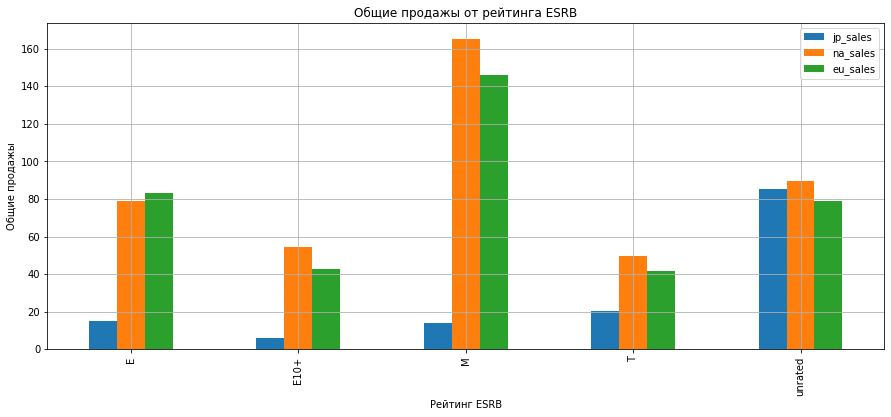

jp_sales
rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

na_sales
rating
M       165.29
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

eu_sales
rating
M       145.80
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64



In [53]:
data_actual.groupby('rating')[['jp_sales', 'na_sales', 'eu_sales']].sum().plot(kind = 'bar', grid=True, figsize = (15,6))
plt.title('Общие продажы от рейтинга ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Общие продажы')
plt.show()
for region in ['jp_sales', 'na_sales', 'eu_sales']:
    print(region)
    print(data_actual[data_actual['rating'] != 'unrated'].groupby('rating')[region].sum().sort_values(ascending = False).head(5))
    print()

Построим круговую диаграмму общих продаж от рейтинга ESRB для каждого региона с учетом игр без рейтинга.

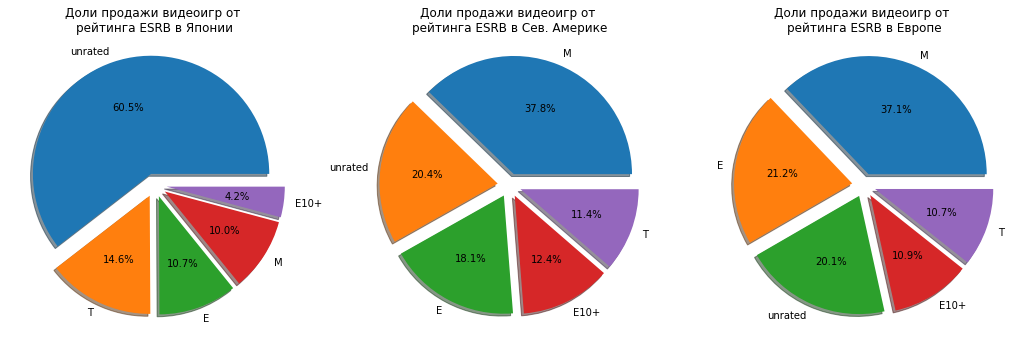

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

explode = list()
for k in range(5):
    explode.append(0.1)

def plot_pie(region, ax):
    ax.pie(data_actual.groupby('rating')[region].sum().sort_values(ascending = False)
        , labels=data_actual.groupby('rating')[region].sum().sort_values(ascending = False).index
        , explode=explode, shadow=True, autopct='%1.1f%%')
    
plot_pie('jp_sales', ax1)  
ax1.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Японии')

plot_pie('na_sales', ax2)  
ax2.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Сев. Америке')

plot_pie('eu_sales', ax3)  
ax3.set_title('Доли продажи видеоигр от \nрейтинга ESRB в Европе')

plt.show()
print()

Рейтинг ***ESRB***:
* **E**    : Игра подходит для лиц от 6 лет и старше;
* **E10+** : Игра подходит для лиц от 10 лет и старше;
* **T**    : Игра подходит для лиц от 13 лет и старше;
* **M**    : Игра подходит для лиц от 17 лет и старше.



По результатам видно, что в Японии больше половины прибыли приносят игры для которых в данных не указан рейтинг. Для Европы и Северной Америки этот показатель составляет пятую часть от всей прибыли.

Если же не учитывать игры без рейтинга, то результаты следующие:  
В Европе и Северной Америке картина одинакова. Больше всего продаж от игры рейтинга M (почти половина от всех продаж). Затем идут игры рейтинга E, E10+, T. Видимо геймеры в Европе предпочитают игры для более старшего возвраста. Но утверждать, что почти 50% геймеров в Европе и Северной Америке старше 17 лет нельзя, так как мы точно не знаем соблюдают ли возврастные ограничения геймеры.

В Японии же совершенно другая ситуация. Там преобладают продажи игр рейтинга T (чуть больше трети от всех продаж). На 2-м месте продажи от игр рейтинга E, а продажи игр рейинга M, которые лидируют в Европе и Северной Америке, только на 3-м месте. На последнем месте продажи от игр рейтинга E10+. Можно сделать вывод, что в основном в Японии играют в игры, которые расчитаны на детей возврастом до 13 лет.

### Выводы
В результате анализа данных удалось выяснить следующее:  

***ОБЩИЕ ПРОДАЖИ ДЛЯ ТОП5 ПЛАТФОРМ В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
3DS    | 67.81 | 49.6%
PS3    | 23.35 | 17.1%
PSV    | 18.59 | 13.6%
PS4    | 15.96 | 11.7%
WiiU   | 10.88 | 8.0%

В Японии самой популярной считается игрова платформа 3DS. Это портативная игровая платформа. Скорее всего японцы играют только, когда они в пути: на работу, учебу и так далее. Интересно отметить, что в Японии до сих пор более популярной считается PS3, чем PS4.  

* **Северная Америка**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
PS4     | 108.74 | 28.2%
XOne    | 93.12 | 24.2%
X360    | 81.66 | 21.2%
PS3     | 63.50 | 16.5%
3DS     | 38.20 | 9.9%

В Северной Америке приблизительно равные доли имеют 3 игровые платформы: XOne, PS4, X360. XOne, PS4 на 2016 год были самыми передовыми платформами. Жители этого континента следят за технологическим погрессом и используют лучшие игровые платформы.  

* **Европа**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
PS4     | 141.09 | 42.2%
PS3     | 67.81 | 20.3%
XOne    | 51.59 | 15.4%
X360    | 42.52 | 12.7%
3DS     | 30.96 | 9.3%

В Европе с большим отрывом лидирует PS4. Самое интересное, что на 2 месте по популярности игровая платформа PS3. И только потом идут консоли от Microsoft: XOne, X360. Видимо геймеры Европы больше отдают свое предпочтение игровым платформам от Sony.

***ОБЩИЕ ПРОДАЖИ ДЛЯ ТОП5 ЖАНРОВ В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Role-Playing    | 51.04 | 44.3%
Action          | 40.49 | 35.1%
Misc            | 9.44 | 8.2%
Fighting        | 7.65 | 6.6%
Shooter         | 6.61 | 5.7%

В Японии самой популярными жанрами являются RPG и Action. Продажи этих 2-х жанров составляют порядка 80% от всех продаж видеоигр в Японии.

* **Северная Америка**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Action          | 126.13 | 33.6%
Shooter         | 109.74 | 29.3%
Sports          | 65.27 | 17.4%
Role-Playing    | 46.40 | 12.4%
Misc            | 27.49 | 7.3%

В Северной Америке два самых популярных жанра являются Action и Shooter. На 3-м месте идет Sports.

* **Европа**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Action          | 118.61 | 36.6%
Shooter         | 87.86 | 27.1%
Sports          | 60.52 | 18.7%
Role-Playing    | 36.97 | 11.4%
Racing          | 20.19 | 6.2%

В Европе картина очень похожа на ситуацию в Северной Америке. Только доля продаж игр жанра Action больше, чем игр жанра Shooter. На 3-м месте здесь тоже игры жанра Sports. Отличие состоит в том, что в Европе на 5 месте игры жанра Racing, а вот в Севереной Америке на 5 месте игры жанра Misc.

***ОБЩИЕ ПРОДАЖИ ВИДЕОИГР В ЗАВИСИМОСТИ ОТ РЕЙТИНГА ESRB В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
T       | 20.59 | 36.9%
E       | 15.14 | 27.2%
M       | 14.11 | 25.3%
E10+    | 5.89 | 10.6%

* **Северная Америка**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
M       | 165.29 | 47.4%
E       | 79.05 | 22.7%
E10+    | 54.24 | 15.6%
T       | 49.79 | 14.3%

* **Европа**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
M       | 145.80 | 46.5%
E       | 83.36 | 26.6%
E10+    | 42.69 | 13.6%
T       | 41.95 | 13.4%

В Европе и Северной Америке картина одинакова. Больше всего продаж от игры рейтинга M (почти половина от всех продаж). Затем идут игры рейтинга E, E10+, T. Видимо геймеры в Европе предпочитают игры для более старшего возвраста. Но утверждать, что почти 50% геймеров в Европе и Северной Америке старше 17 лет нельзя, так как мы точно не знаем соблюдают ли возврастные ограничения геймеры.

В Японии же совершенно другая ситуация. Там преобладают продажи игр рейтинга T (чуть больше трети от всех продаж). На 2-м месте продажи от игр рейтинга E, а продажи игр рейинга M, которые лидируют в Европе и Северной Америке, только на 3-м месте. На последнем месте продажи от игр рейтинга E10+. Можно сделать вывод, что в основном в Японии играют в игры, которые расчитаны на детей возврастом до 13 лет.

Типичный **японский** геймер: играет на платформе **3DS** в игры жанра **Role-Playin** с рейтингом ESRB **T**;  
Типичный **североамериканский** геймер: играет на платформе **PS4** в игры жанра **Action** с рейтингом ESRB **M**;  
Типичный **европейский** геймер: играет на платформе **PS4** в игры жанра **Action** с рейтингом ESRB **M**.

## 5. Проверка гипотез<a id="проверка_гипотез"></a>

## 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a id="проверка_гипотез__средние_пользовательские_рейтинги_платформ_Xbox_One_и_PC_одинаковые"></a>

Перед проверкой этой гипотезы, проверим, что дисперсии пользовательских рейтингов Xbox One и PC одинаковые. Для этого будем использовать тест Левене. Для этого воспозуемся методом `scipy.stats.levene` из модуля `scipy`, который позволяет проверить гипотезы о равенстве дисперсий выборок.

Сформулируем нулевую и альтернативную гипотезы.  
$H_{0}$ - дисперсии пользовательских рейтингов платформ Xbox One и PC одинаковые.  
$H_{1}$ - дисперсии пользовательских рейтингов платформ Xbox One и PC различаются.

In [55]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

data_PC = data_actual.query('platform == "PC" & user_score > 0')['user_score']
data_XOne = data_actual.query('platform == "XOne" & user_score > 0')['user_score']

results = st.levene( data_PC, data_XOne)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0042072165032298915
Отвергаем нулевую гипотезу


Проверим себя и посчитаем реальные значения дисперсий.

In [56]:
print('Дисперсия пользовательского рейтинга платформы PC составляет: {:.2f}'.format(np.var(data_PC, ddof=1)))
print('Дисперсия пользовательского рейтинга платформы Xbox One составляет: {:.2f}'.format(np.var(data_XOne, ddof=1)))

Дисперсия пользовательского рейтинга платформы PC составляет: 3.01
Дисперсия пользовательского рейтинга платформы Xbox One составляет: 1.91


Дисперсии отличаются, что также подтверждается вычисленными значениями дисперсий.

Теперь проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого воспозуемся методом `scipy.stats.ttest_ind` из модуля `scipy`, который позволяет проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Сформулируем нулевую и альтернативную гипотезы.  
$H_{0}$ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
$H_{1}$ - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [57]:
results = st.ttest_ind(
    data_XOne, 
    data_PC,
    equal_var = False) # equal_var = False, так как мы выяснили выше, что дисперсии отличаются 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.16174359801784308
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги платформ Xbox One и PC не отличается, поэтому мы не можем отвергнуть нулевую гипотезу.

## 5.2 Средние пользовательские рейтинги жанров Action и Sports разные.<a id="проверка_гипотез__средние_пользовательские_рейтинги_жанров_Action_и_Sports_разные"></a>

Перед проверкой этой гипотезы, проверим, что дисперсии пользовательских рейтингов жанров Action и Sports одинаковые. Для этого будем использовать тест Левене. Для этого воспозуемся методом `scipy.stats.levene` из модуля `scipy`, который позволяет проверить гипотезы о равенстве дисперсий выборок.

Сформулируем нулевую и альтернативную гипотезы.  
$H_{0}$ - дисперсии пользовательских рейтингов жанров Action и Sports одинаковые.  
$H_{1}$ - дисперсии пользовательских рейтингов жанров Action и Sports различаются.

In [58]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

data_Action = data_actual.query('genre == "Action" & user_score > 0')['user_score']
data_Sports = data_actual.query('genre == "Sports" & user_score > 0')['user_score']

results = st.levene( data_Action, data_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.241765365098557e-07
Отвергаем нулевую гипотезу


Проверим себя и посчитаем реальные значения дисперсий.

In [59]:
print('Дисперсия пользовательского рейтинга жанра Action составляет: {:.2f}'.format(np.var(data_Action, ddof=1)))
print('Дисперсия пользовательского рейтинга жанра Sports составляет: {:.2f}'.format(np.var(data_Sports, ddof=1)))

Дисперсия пользовательского рейтинга жанра Action составляет: 1.77
Дисперсия пользовательского рейтинга жанра Sports составляет: 3.18


Дисперсии отличаются, что также подтверждается вычисленными значениями дисперсий.

Теперь проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. Для этого воспозуемся методом `scipy.stats.ttest_ind` из модуля `scipy`, который позволяет проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Сформулируем нулевую и альтернативную гипотезы.  
$H_{0}$ - средние пользовательские рейтинги жанров Action и Sports одинаковые.  
$H_{1}$ - средние пользовательские рейтинги жанров Action и Sports различаются.

In [60]:
results = st.ttest_ind(
    data_Action, 
    data_Sports,
    equal_var = False) # equal_var = False, так как мы выяснили выше, что дисперсии отличаются 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские рейтинги жанров Action и Sports различаются, поэтому отвергаем нулевую гипотезу.

### Выводы
Проверили гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о различии средних пользовательских рейтингов жанров Action и Sports. Получили следующие результаты:  
 * Средние пользовательские рейтинги платформ Xbox One и PC не отличается (p-значение: 0.16);
 * Средние пользовательские рейтинги жанров Action и Sports различается (p-значение: 1.38e-20).

## 6. Общий вывод<a id="общий_вывод"></a>

Целью данного проекта было провести анализ проданных игр интернет-магазином «Стримчик», выявить определяющие успешность игры закономерности и выбрать потенциально популярный продукт, чтобы сплаинровать рекламные компании. В результате проделанной работы удалось выяснить следующее:

***КОЛИЧЕСТВО ВЫПУСКАЕМЫХ ВИДЕОИГР В ГОД.***
* **До 1995 года** выпускалось очень мало видеоигр;
* **До 2009** года количество впускаемых игр для игровых платформ в год постоянно росло, но затем начился постепенный спад.  
* **В 2012 году** случился резкий пропал, количество выпускамых игр упало почти в два раза. Можно предположить, что широкое распространение получили мобильные игры и многие разработчики видеоигр переключились на это перспективное направление.  
* **С 2012 по 2016 года** количество выпускаемых видеоигр в год практически не меняется.

***САМЫЕ ПРИБЫЛЬНЫЕ ИГРОВЫЕ ПЛАТФОРМЫ ЗА ВСЕ ВРЕМЯ.***  
Самой прибыльной игровой платформой является **PS2**. Общая прибыль составили **1255.77**.  
**Топ 10** самых прибыльных игровых платформ:

**Платформа**  | **Общая прибыль**
:-------------: | :-------------:
PS2   |   1255.77
X360  |   971.42
PS3   |   939.65
Wii   |   907.51
DS    |   806.12
PS    |   730.86
GBA   |   317.85
PS4   |   314.14
PSP   |   294.05
PC    |   259.52

***ЖИЗНЕННЫЙ ЦИКЛ ИГРОВОЙ ПЛАТФОРМЫ.***  
Жизненный цикл игровой платформы составляет **8 лет** с пиком популярности **на 4 год** выпуска игровой платформы. Поэтому актуальными данными был выбран промежуток времени **с 2013 по 2016 год**.

***ОБЩИЕ ПРОДАЖИ ВИДЕОИГР ПО ПЛАТФОРМАМ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **В 2013 году** на рынке видеоигр преобладали продажи игр для **3DS, PS3, X360**. Это был пик популярности этих игровых платформ, так как затем (2014-2016 года) продажы видеоигр для этих платформ практически прекратились.
* **На 2016 год** самыми популрными игровыми платформами являются **PS4, Xbox One, 3DS**. PS4, Xbox One вышли в конце 2013 года и поэтому в 2017 году они должны выйти на пик своей популярности. Поэтому акцент **в 2017 году** стоит сделать именно на эти две игровые платформы.
* Наиболее выгодно было выпускать игры в этот период для следующих игровых платформ: **PS3, PS4, Wii, WiiU, X360, XOne**, так как медиана прибыли за одну игру у них выше, чем у других игровых платформ.

***САМЫЕ ПРИБЫЛЬНЫЕ ИГРОВЫЕ ПЛАТФОРМЫ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
Самой прибыльной игровой платформой за актуальной период является **PS4**. Общая прибыль составили **314.14**.  
**Топ 10** самых прибыльных игровых платформ за актуальный период:

**Платформа**  | **Общая прибыль**
:-------------: | :-------------:
PS4   |  314.14
PS3   |  181.43
XOne  |  159.32
3DS   |  143.25
X360  |  136.80
WiiU  |   64.63
PC    |   40.06
PSV   |   32.99
Wii   |   13.66
PSP   |    3.74

***ВЛИЯНИЕ ОЦЕНОК КРИТИКОВ И ПОЛЬЗОВАТЕЛЕЙ НА ОБЩУЮ ПРИБЫЛЬ ЗА ИГРУ ДЛЯ ТОП5 ПЛАТФОРМ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  

* **Игровая платформа: PS4**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.41**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.03**  


* **Игровая платформа: PS3**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.33**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **0.00**  


* **Игровая платформа: XOne**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.42**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.07**  


* **Игровая платформа: 3DS**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.36**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **0.24**   


* **Игровая платформа: X360**  
Коэффициент корреляции оценки **критиков** и общей прибыли за игру: **0.35**  
Коэффициент корреляции оценки **пользователей** и общей прибыли за игру: **-0.01**  

Оценка пользователей никак не сказывается на общей прибыли за игру, что подтверждается значением коэффициента.
Оценка критиков имеет некотое влияние на общую прибыль за игру, что подтверждается значением коэффициента корреляции.
В целом такая тенденция сохраняется для всех игровых платформ, за исключением 3DS. Для 3DS коэффициент корреляции оценки пользователей и общей прибыли за игру составляет 0.24. Это означает, что есть некоторое влияние оценки пользователей на общую прибыль за игру.

***КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР РАЗНЫХ ЖАНРОВ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
**Больше** всего было выпущено игр жанра **Action - 769**, **меньше** всего жанра **Puzzle - 17**.  
Распределение выпущенных игр по жанрам:  

**Жанр**  | **Количество игр**
:-------------: | :-------------:
Action          | 769
Role-Playing    | 292
Adventure       | 245
Sports          | 214
Shooter         | 187
Misc            | 156
Racing          | 85
Fighting        | 80
Platform        | 74
Simulation      | 62
Strategy        | 56
Puzzle          | 17

***ОБЩАЯ ПРИБЫЛЬ ОТ ИГР В ЗАВИСИМОСТИ ОТ ЖАНРА ЗА АКТУАЛЬНЫЙ ПЕРИОД.***  
**Самым прибыльным** жанром за актуальный период является ***Action - 322.5**, **меньше всего** принесли дохода игры жанра **Puzzle - 3.17**.
Распределение прибыли от игр по жанрам:  

**Жанр**  | **Общая прибыль**
:-------------: | :-------------:
Action          | 322.50
Shooter         | 232.98
Sports          | 150.65
Role-Playing    | 145.89
Misc            | 63.06
Platform        | 42.63
Racing          | 39.89
Fighting        | 35.31
Adventure       | 23.64
Simulation      | 21.76
Strategy        | 10.08
Puzzle          | 3.17

Хоть и суммарная выручка больше у игр жанра Action, но в среднем игра жанра Shooter приносит больше прибыли.

***ОБЩИЕ ПРОДАЖИ ДЛЯ ТОП5 ПЛАТФОРМ В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
3DS    | 67.81 | 49.6%
PS3    | 23.35 | 17.1%
PSV    | 18.59 | 13.6%
PS4    | 15.96 | 11.7%
WiiU   | 10.88 | 8.0%

В Японии самой популярной считается игрова платформа 3DS. Это портативная игровая платформа. Скорее всего японцы играют только, когда они в пути: на работу, учебу и так далее. Интересно отметить, что в Японии до сих пор более популярной считается PS3, чем PS4.  

* **Северная Америка**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
PS4     | 108.74 | 28.2%
XOne    | 93.12 | 24.2%
X360    | 81.66 | 21.2%
PS3     | 63.50 | 16.5%
3DS     | 38.20 | 9.9%

В Северной Америке приблизительно равные доли имеют 3 игровые платформы: XOne, PS4, X360. XOne, PS4 на 2016 год были самыми передовыми платформами. Жители этого континента следят за технологическим погрессом и используют лучшие игровые платформы.  

* **Европа**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 платформ**
:-------------: | :-------------: | :-------------:
PS4     | 141.09 | 42.2%
PS3     | 67.81 | 20.3%
XOne    | 51.59 | 15.4%
X360    | 42.52 | 12.7%
3DS     | 30.96 | 9.3%

В Европе с большим отрывом лидирует PS4. Самое интересное, что на 2 месте по популярности игровая платформа PS3. И только потом идут консоли от Microsoft: XOne, X360. Видимо геймеры Европы больше отдают свое предпочтение игровым платформам от Sony.

***ОБЩИЕ ПРОДАЖИ ДЛЯ ТОП5 ЖАНРОВ В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Role-Playing    | 51.04 | 44.3%
Action          | 40.49 | 35.1%
Misc            | 9.44 | 8.2%
Fighting        | 7.65 | 6.6%
Shooter         | 6.61 | 5.7%

В Японии самой популярными жанрами являются RPG и Action. Продажи этих 2-х жанров составляют порядка 80% от всех продаж видеоигр в Японии.

* **Северная Америка**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Action          | 126.13 | 33.6%
Shooter         | 109.74 | 29.3%
Sports          | 65.27 | 17.4%
Role-Playing    | 46.40 | 12.4%
Misc            | 27.49 | 7.3%

В Северной Америке два самых популярных жанра являются Action и Shooter. На 3-м месте идет Sports.

* **Европа**

**Платформа**  | **Общая прибыль** | **Доля от общей прибыли топ5 жанров**
:-------------: | :-------------: | :-------------:
Action          | 118.61 | 36.6%
Shooter         | 87.86 | 27.1%
Sports          | 60.52 | 18.7%
Role-Playing    | 36.97 | 11.4%
Racing          | 20.19 | 6.2%

В Европе картина очень похожа на ситуацию в Северной Америке. Только доля продаж игр жанра Action больше, чем игр жанра Shooter. На 3-м месте здесь тоже игры жанра Sports. Отличие состоит в том, что в Европе на 5 месте игры жанра Racing, а вот в Севереной Америке на 5 месте игры жанра Misc.

***ОБЩИЕ ПРОДАЖИ ВИДЕОИГР В ЗАВИСИМОСТИ ОТ РЕЙТИНГА ESRB В РЕГИОНЕ ЗА АКТУАЛЬНЫЙ ПЕРИОД.***
* **Япония**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
T       | 20.59 | 36.9%
E       | 15.14 | 27.2%
M       | 14.11 | 25.3%
E10+    | 5.89 | 10.6%

* **Северная Америка**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
M       | 165.29 | 47.4%
E       | 79.05 | 22.7%
E10+    | 54.24 | 15.6%
T       | 49.79 | 14.3%

* **Европа**

**Рейтинг**  | **Общая прибыль** | **Доля от общей прибыли**
:-------------: | :-------------: | :-------------:
M       | 145.80 | 46.5%
E       | 83.36 | 26.6%
E10+    | 42.69 | 13.6%
T       | 41.95 | 13.4%

В Европе и Северной Америке картина одинакова. Больше всего продаж от игры рейтинга M (почти половина от всех продаж). Затем идут игры рейтинга E, E10+, T. Видимо геймеры в Европе предпочитают игры для более старшего возвраста. Но утверждать, что почти 50% геймеров в Европе и Северной Америке старше 17 лет нельзя, так как мы точно не знаем соблюдают ли возврастные ограничения геймеры.

В Японии же совершенно другая ситуация. Там преобладают продажи игр рейтинга T (чуть больше трети от всех продаж). На 2-м месте продажи от игр рейтинга E, а продажи игр рейинга M, которые лидируют в Европе и Северной Америке, только на 3-м месте. На последнем месте продажи от игр рейтинга E10+. Можно сделать вывод, что в основном в Японии играют в игры, которые расчитаны на детей возврастом до 13 лет.  

Типичный **японский** геймер: играет на платформе **3DS** в игры жанра **Role-Playin** с рейтингом ESRB **T**;  
Типичный **североамериканский** геймер: играет на платформе **PS4** в игры жанра **Action** с рейтингом ESRB **M**;  
Типичный **европейский** геймер: играет на платформе **PS4** в игры жанра **Action** с рейтингом ESRB **M**.

Также проверили гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о различии средних пользовательских рейтингов жанров Action и Sports. Получили следующие результаты:  
 * Средние пользовательские рейтинги платформ Xbox One и PC не отличается (p-значение: 0.16);
 * Средние пользовательские рейтинги жанров Action и Sports различается (p-значение: 1.38e-20).